FIFA Project:

Is the Overall Rating of players affected by their speed and physical traits?

I will focus on the following columns:

OVA: Overall Rating

bp: best_position

jumping

stamina

strenght

acceleration

spring speed

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Cleaning

In [2]:
# Bringing the data:

df = pd.read_csv('fifa21_male2.csv')

In [3]:
df.shape

(17125, 107)

In [7]:
# Show all columns:

pd.set_option("display.max_columns", None)

In [8]:
#Standardise columns

df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

In [9]:
df

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [10]:
# Lets see the percentage of nulls based on the series

nulls_percent = round(df.isna().sum()/len(df)*100,2)

In [11]:
nulls_percent

id             0.0
name           0.0
age            0.0
ova            0.0
nationality    0.0
              ... 
cb             0.0
rcb            0.0
rb             0.0
gk             0.0
gender         0.0
Length: 107, dtype: float64

EDA


In [12]:
# Keeping only the columns needed:

df_pro = df.filter(items=['ova','bp','aggression','jumping','stamina','strength','acceleration','sprint_speed'])


In [13]:
df_pro

,ova,bp,aggression,jumping,stamina,strength,acceleration,sprint_speed
0,69,LWB,72,68.0,69,68,68,74
1,71,CM,71,54.0,64,60,56,50
2,71,CAM,69,58.0,29,56,48,42
3,68,ST,59,NaN,51,66,59,62
4,81,CAM,58,40.0,58,62,61,56
...,...,...,...,...,...,...,...,...
17120,64,CB,69,70.0,59,74,52,55
17121,56,CAM,51,62.0,53,57,61,63
17122,56,RB,58,61.0,53,54,66,61
17123,62,RB,61,72.0,57,48,72,70


In [14]:
# Dealing with null values:

df_pro.isna().sum()

ova              0
bp               0
aggression       0
jumping         58
stamina          0
strength         0
acceleration     0
sprint_speed     0
dtype: int64

In [15]:
#Dropping null values
df_pro.dropna()

,ova,bp,aggression,jumping,stamina,strength,acceleration,sprint_speed
0,69,LWB,72,68.0,69,68,68,74
1,71,CM,71,54.0,64,60,56,50
2,71,CAM,69,58.0,29,56,48,42
4,81,CAM,58,40.0,58,62,61,56
5,66,RW,63,70.0,64,61,90,91
...,...,...,...,...,...,...,...,...
17120,64,CB,69,70.0,59,74,52,55
17121,56,CAM,51,62.0,53,57,61,63
17122,56,RB,58,61.0,53,54,66,61
17123,62,RB,61,72.0,57,48,72,70


In [16]:
df_pro.describe()

,ova,aggression,jumping,stamina,strength,acceleration,sprint_speed
count,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,66.965022,56.997839,65.170212,63.309606,65.308555,65.445898,65.443036
std,6.864329,17.021619,11.918063,15.313272,12.627212,14.657889,14.437377
min,38.000000,9.000000,22.000000,11.000000,16.000000,12.000000,11.000000
25%,62.000000,45.000000,58.000000,56.000000,58.000000,58.000000,59.000000
50%,67.000000,60.000000,66.000000,66.000000,67.000000,68.000000,68.000000
75%,72.000000,70.000000,73.000000,73.000000,74.000000,75.000000,75.000000
max,93.000000,96.000000,95.000000,97.000000,97.000000,97.000000,96.000000


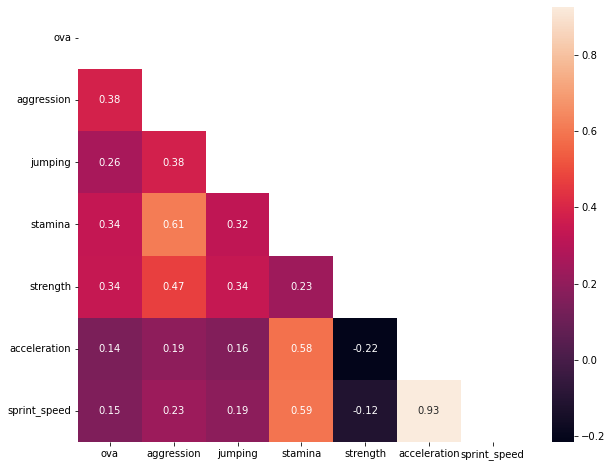

In [18]:
# Plot to see if there are any correlation 
# between OVA (overall rating) and speed and physical traits

correlations_matrix = df_pro.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

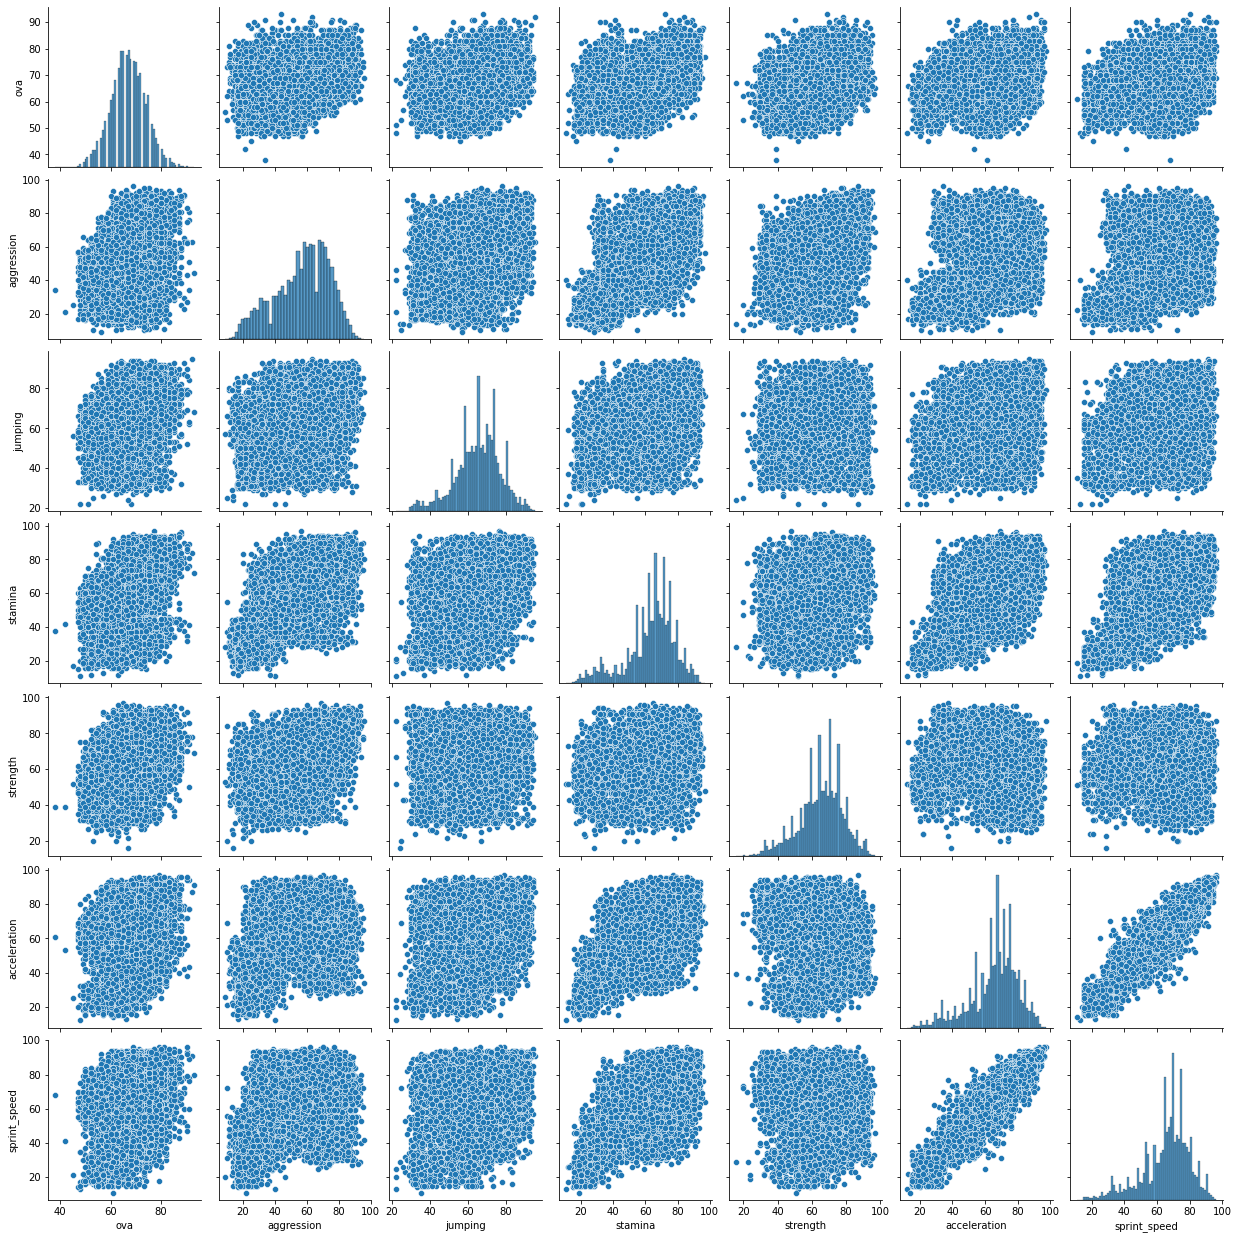

In [19]:
sns.pairplot(df_pro)